# **- Introduction to Deep Learning**

Deep learning is just a modern name for artificial neural networks (ANN) with many layers. What is deep in deep learning though? It is basically due to the structure of the ANN. ANN consists of some n number of layers to perform any computation. We can build an ANN with several layers where each layer is responsible for learning the intricate patterns in the data. Due to the computational advancements, we can build a network even with 100s or 1000s of layers deep. Since the ANN uses deep layers to perform learning we call it as deep learning and when ANN uses deep layers to learn we call it as a deep network.

# **-ANN and its layers**


A typical ANN consists of the following layers:

-Input layer

-Hidden layer

-Output layer

Each layer has a collection of neurons, and the neurons in one layer interact with all the neurons in the other layers. However, neurons in the same layer will not interact with one another. This is simply because neurons from the adjacent layers have connections or edges between them; however, neurons in the same layer do not have any connections. We use the term nodes or units to represent the neurons in the artificial neural network.

**Input layer**

The input layer is where we feed input to the network. The number of neurons in the input layer is the number of inputs we feed to the network. Each input will have some influence on predicting the output. However, no computation is performed in the input layer; it is just used for passing information from the outside world to the network.

**Hidden layer**

Any layer between the input layer and the output layer is called a hidden layer. It processes the input received from the input layer. The hidden layer is responsible for deriving complex relationships between input and output. That is, the hidden layer identifies the pattern in the dataset. It is majorly responsible for learning the data representation and for extracting the features.
There can be any number of hidden layers; however, we have to choose a number of hidden layers according to our use case. For a very simple problem, we can just use one hidden layer, but while performing complex tasks such as image recognition, we use many hidden layers, where each layer is responsible for extracting important features. The network is called a deep neural network when we have many hidden layers.

**Output layer**

After processing the input, the hidden layer sends its result to the output layer. As the name suggests, the output layer emits the output. The number of neurons in the output layer is based on the type of problem we want our network to solve. If it is a binary classification, then the number of neurons in the output layer is one that tells us which class the input belongs to. If it is a multi-class classification say, with five classes, and if we want to get the probability of each class as an output, then the number of neurons in the output layer is five, each emitting the probability. If it is a regression problem, then we have one neuron in the output layer.









# **Building Neural Network from Scratch**

First, import the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Prepare the data as shown in the above XOR table:

In [10]:
x = np.array([ [0, 1], [1, 0], [1, 1],[0, 0] ])
y = np.array([ [1], [1], [0], [0]])

Define the number of nodes in each layer:

In [11]:
num_input = 2
num_hidden = 5
num_output = 1

Initialize weights and bias randomly. First, we initialize, input to hidden layer weights:

In [12]:
Wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))

Now initialize, hidden to output layer weights:

In [13]:
Why = np.random.randn (num_hidden,num_output)
by = np.zeros((1,num_output))

Define the sigmoid activation function:

In [14]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

Define the derivative of the sigmoid function:

In [15]:
def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

Define the forward propagation:

In [16]:
def forward_prop(x,Wxh,Why):
    z1 = np.dot(x,Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)

    return z1,a1,z2,y_hat

Define the backward propagation:

In [17]:
def backword_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(x.T, delta1)

    return dJ_dWxh, dJ_dWhy


Define the cost function:

In [18]:
def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)

    return J

Set the learning rate and number of training iterations:

In [19]:
alpha = 0.01
num_iterations = 5000

Now let's start training the network:

In [20]:
cost = []
for i in range(num_iterations):

    #perform forward propagation and predict output
    z1,a1,z2,y_hat = forward_prop(x,Wxh,Why)

    #perform backward propagation and calculate gradients
    dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)

    #update the weights
    Wxh = Wxh -alpha * dJ_dWxh
    Why = Why -alpha * dJ_dWhy

    #compute cost
    c = cost_function(y, y_hat)

    #store the cost
    cost.append(c)

Plot the cost function:

Text(0, 0.5, 'Cost')

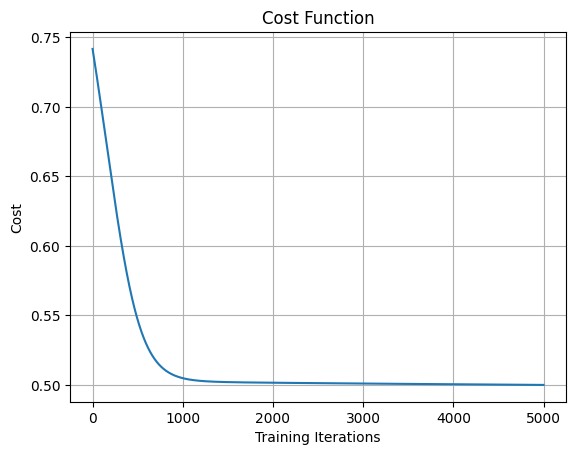

In [21]:
plt.grid()
plt.plot(range(num_iterations),cost)

plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')